In [1]:
#import Pustaka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [2]:
#inisiasi data training
import pandas as pd
df_train = pd.read_csv('training_dataset.csv')
df_train

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [3]:
#inisiasi data validasi
df_val = pd.read_csv('validation_set.csv')
df_val

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [5]:
def preprocess_data(df, label_encoders=None, scaler=None, is_train=True):
    df = df.copy()
    df.columns = df.columns.str.strip()

    # Map yes/no ke 1/0
    for col in ['gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi']:
        if col in df.columns:
            df[col] = df[col].map({'yes': 1, 'no': 0})

    # Map bulan ke angka
    month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    if 'bulan_kontak_terakhir' in df.columns:
        df['bulan_kontak_terakhir'] = df['bulan_kontak_terakhir'].map(month_map)

    # Map hari ke angka
    day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
    if 'hari_kontak_terakhir' in df.columns:
        df['hari_kontak_terakhir'] = df['hari_kontak_terakhir'].map(day_map)

    label_cols = ['pekerjaan', 'status_perkawinan', 'pendidikan',
                  'jenis_kontak', 'hasil_kampanye_sebelumnya', 'pulau']

    if is_train:
        label_encoders = {}
        for col in label_cols:
            if col in df.columns:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                label_encoders[col] = le
    else:
        for col in label_cols:
            if col in df.columns and label_encoders is not None and col in label_encoders:
                le = label_encoders[col]
                # Jika nilai baru tidak ada di training, isi -1
                df[col] = df[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

    # Isi missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object' or col in label_cols:
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)

    num_cols = ['usia', 'hari_sejak_kontak_sebelumnya', 'jumlah_kontak_sebelumnya',
                'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen',
                'indeks_kepercayaan_konsumen', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
    num_cols = [col for col in num_cols if col in df.columns]

    if is_train:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        if scaler is not None:
            df[num_cols] = scaler.transform(df[num_cols])

    if is_train:
        return df, label_encoders, scaler
    else:
        return df

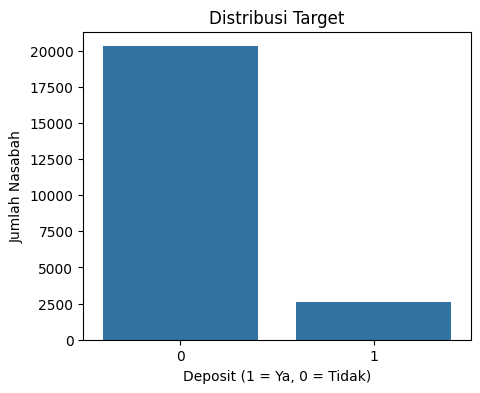

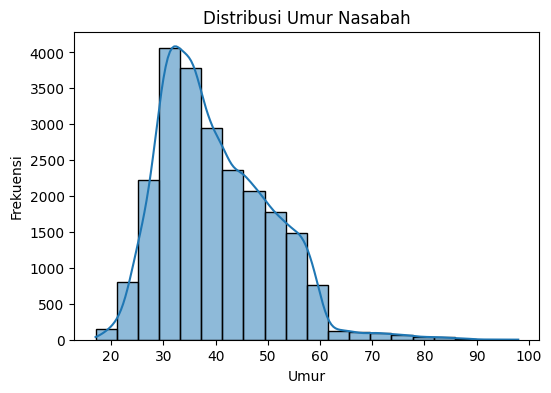

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi target
plt.figure(figsize=(5,4))
sns.countplot(x='berlangganan_deposito', data=df_train)
plt.title("Distribusi Target")
plt.xlabel("Deposit (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Nasabah")
plt.show()

# Distribusi umur
plt.figure(figsize=(6,4))
sns.histplot(df_train['usia'], bins=20, kde=True)
plt.title("Distribusi Umur Nasabah")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

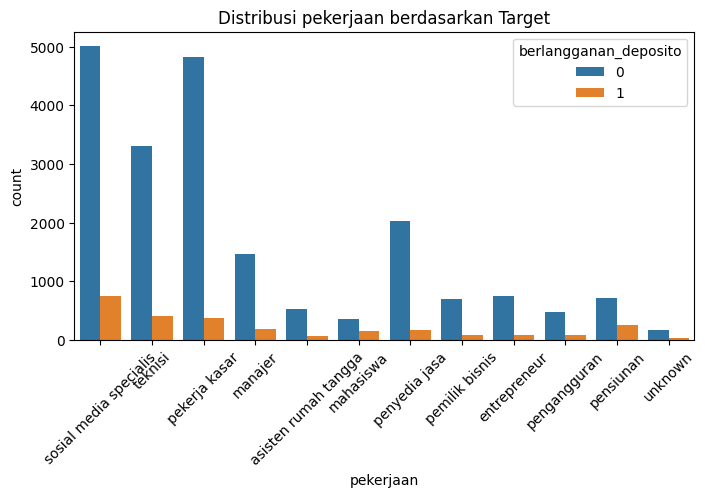

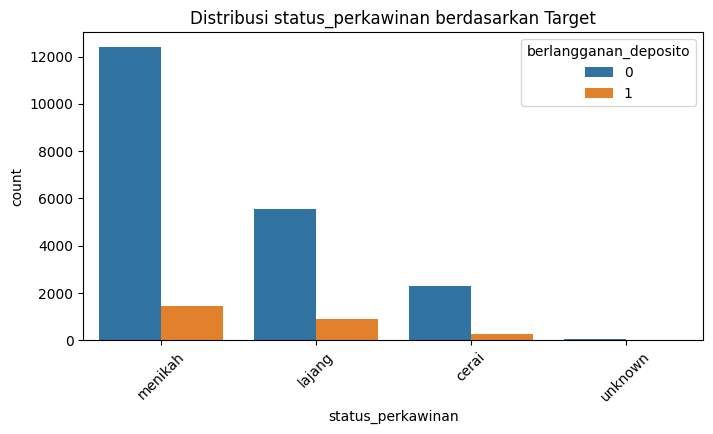

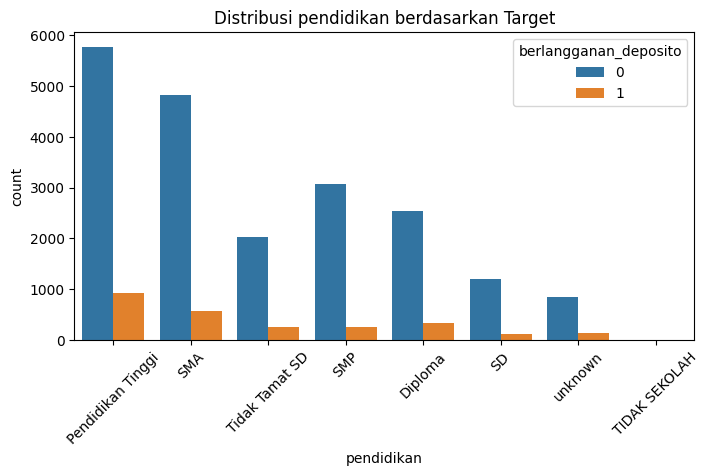

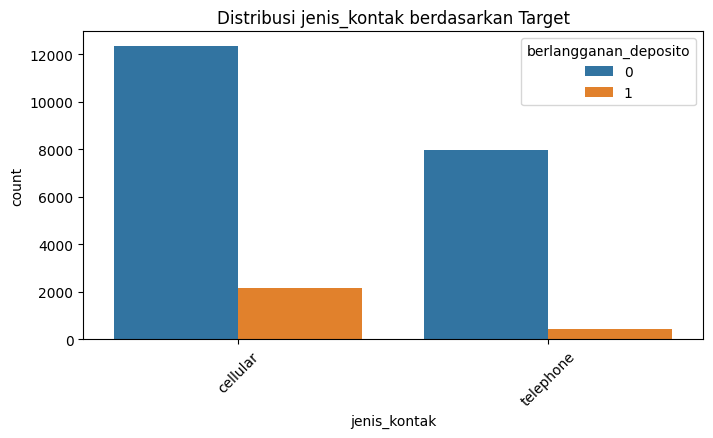

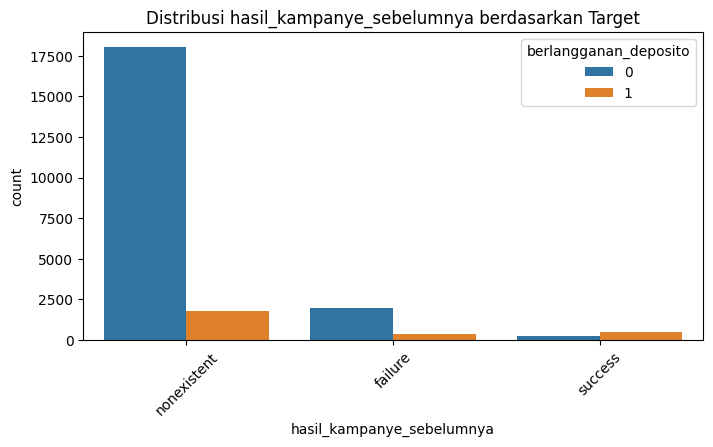

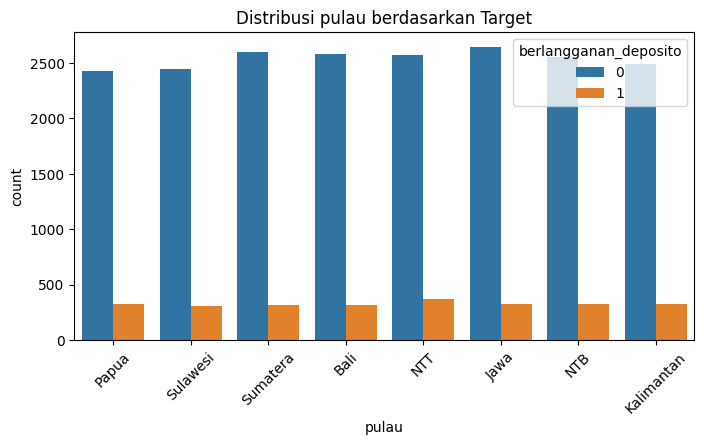

In [7]:
cat_cols = ['pekerjaan', 'status_perkawinan', 'pendidikan',
            'jenis_kontak', 'hasil_kampanye_sebelumnya', 'pulau']

for col in cat_cols:
    if col in df_train.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue='berlangganan_deposito', data=df_train)
        plt.title(f"Distribusi {col} berdasarkan Target")
        plt.xticks(rotation=45)
        plt.show()

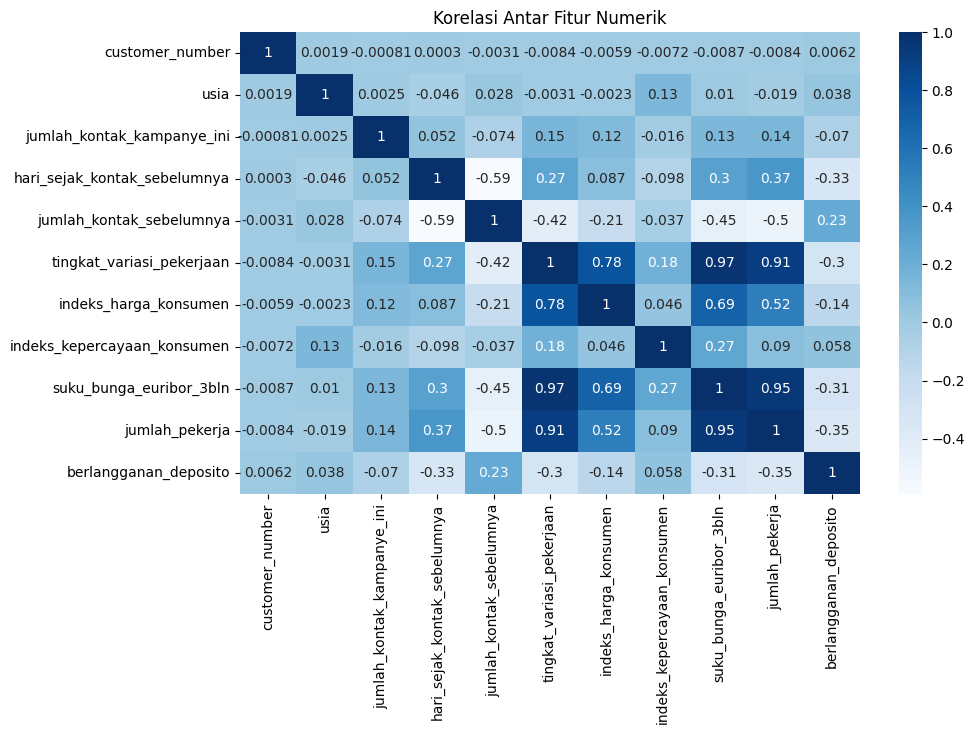

In [8]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df_train[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

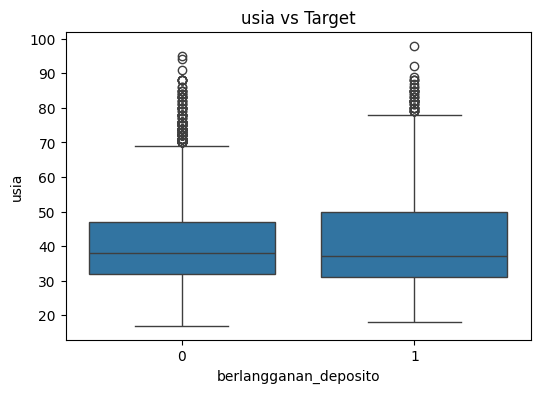

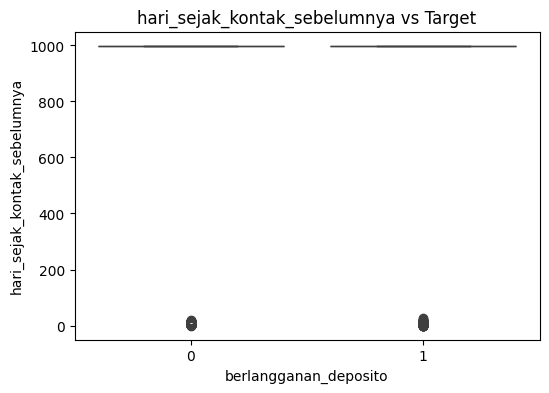

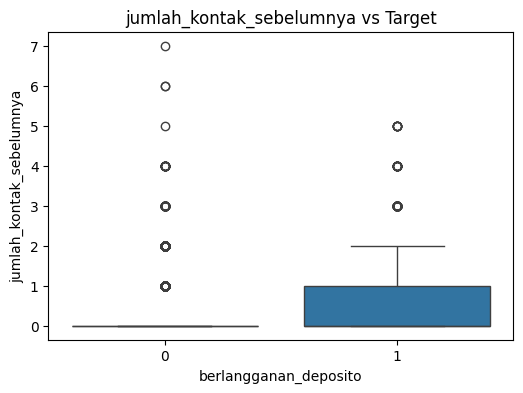

In [9]:
for col in ['usia', 'hari_sejak_kontak_sebelumnya', 'jumlah_kontak_sebelumnya']:
    if col in df_train.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='berlangganan_deposito', y=col, data=df_train)
        plt.title(f"{col} vs Target")
        plt.show()

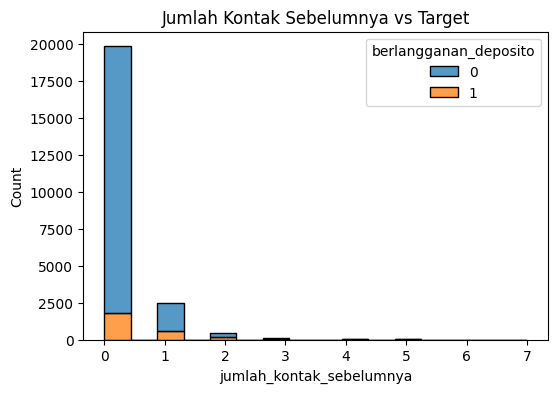

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_train, x='jumlah_kontak_sebelumnya', hue='berlangganan_deposito', multiple='stack')
plt.title("Jumlah Kontak Sebelumnya vs Target")
plt.show()

In [11]:
# Preprocess training data
train_df, label_encoders, scaler = preprocess_data(df_train, is_train=True)

# Preprocess validation data dengan encoder dan scaler dari train
val_df = preprocess_data(df_val, label_encoders=label_encoders, scaler=scaler, is_train=False)

/tmp/ipython-input-3700733901.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3700733901.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [12]:
# Pisahkan fitur dan target
X = train_df.drop(columns=['customer_number', 'berlangganan_deposito'])
y = train_df['berlangganan_deposito']

In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best CatBoost Params: {'learning_rate': 0.05, 'l2_leaf_reg': 7, 'iterations': 300, 'depth': 4, 'border_count': 64, 'bagging_temperature': 0.5}
Validation AUC Score: 0.7937203346857177

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      4061
           1       0.65      0.24      0.35       523

    accuracy                           0.90      4584
   macro avg       0.78      0.61      0.65      4584
weighted avg       0.88      0.90      0.88      4584



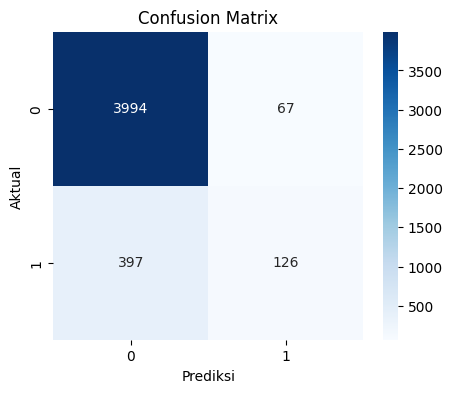

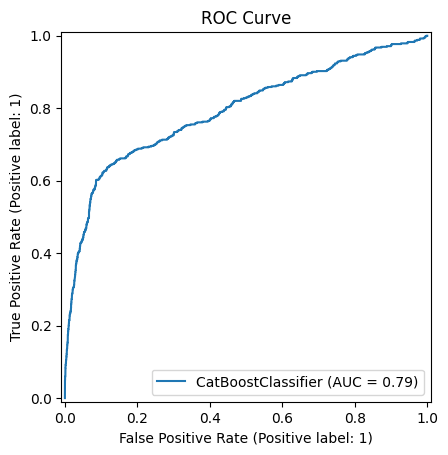

In [14]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split data train-validation dengan stratify
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Definisikan model dasar CatBoost
cat_model = CatBoostClassifier(
    verbose=0,
    random_seed=42,
    eval_metric='AUC'
)

# 3. Parameter grid untuk RandomizedSearch
param_dist = {
    'iterations': [200, 300, 500],
    'depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.2, 0.5, 1],
    'border_count': [32, 64, 128]
}

# 4. Randomized Search dengan CV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 5. Training
random_search.fit(X_train, y_train)

# 6. Evaluasi
best_cat_model = random_search.best_estimator_
y_pred = best_cat_model.predict(X_val)
y_pred_proba = best_cat_model.predict_proba(X_val)[:, 1]

# 7. Skor AUC
auc_score = roc_auc_score(y_val, y_pred_proba)
print("Best CatBoost Params:", random_search.best_params_)
print("Validation AUC Score:", auc_score)

# 8. Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# 10. ROC Curve
RocCurveDisplay.from_estimator(best_cat_model, X_val, y_val)
plt.title("ROC Curve")
plt.show()

In [15]:
# Prediksi Probabilitas
X_val_predict = val_df.drop(columns=['customer_number'])
val_proba = best_cat_model.predict_proba(X_val_predict)[:, 1]  # probabilitas kelas 1

# Simpan hasil prediksi
hasil = pd.DataFrame({
    'customer_number': val_df['customer_number'],
    'berlangganan_deposito': val_proba
})

hasil.to_csv('hasil_prediksi_Catboost.csv', index=False)
print("\n✅ File prediksi berhasil disimpan sebagai 'hasil_prediksi_Catboost.csv'")


✅ File prediksi berhasil disimpan sebagai 'hasil_prediksi_Catboost.csv'


In [16]:
df_hasil = pd.read_csv('hasil_prediksi_Catboost.csv')
df_hasil

,customer_number,berlangganan_deposito
0,445420,0.053754
1,585604,0.034809
2,888824,0.027945
3,816820,0.033346
4,542716,0.068728
...,...,...
5724,782072,0.044474
5725,116371,0.034746
5726,773759,0.028743
5727,612330,0.025986
